# Проектная работа принятие решений в бизнесе

# Описание проекта 

Наш прект состоит из проверки приоритизации гипотез и проведения анализа A/B-теста. 
Для проверки гипотез нам понадобиться применить несколько видов фреймворков и выяснить какая была между ними разница и какой лучше показывает результат.
Для проведения анализа АВ-теста нужно выполнить следующие задачи: построить несколько кумулятивных графиков, посчитать перцентили и рассчитать статистическую значимость по "сырым" и "очищенным" данным. Затем принять решение о продолжении или приостановлении теста.


Приоритизация гипотез. Задачи:
 - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
 
 - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
 
 - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
 
 
Анализ A/B-теста. Задачи:
 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 
 - Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
 
 - Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 
 - Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
 
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 
 - Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
 
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 
 - Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
 

## Приоритизация гипотез 

In [1]:
import pandas as pd
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
priori = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 130

priori

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [2]:
priori.columns = priori.columns.str.lower()
priori

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
priori['ice'] = priori['impact'] * priori['confidence'] / priori['efforts']
priori
print(round(priori[['hypothesis', 'ice']].sort_values(by = 'ice', ascending=False)), 2)

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [4]:
priori['rice'] = priori['reach'] * priori['impact'] * priori['confidence'] / priori['efforts']
print(priori[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))
priori

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Это произошло по причине того, что приоритизация RICE учитывает охват.

- Например, без охвата на первом месте была гипотеза про "Запустить акцию, дающую скидку на товар в день...", однако как только стал учитываться охват, стало ясно, что такая гипотеза не в приоритете;


- А вот гипотеза о "Добавить блоки рекомендаций товаров на сайт ин..." осталась также высоко в рейтинге;


- С учетом охвата гипотезы "Добавить форму подписки на все основные страни..." и "Добавить блоки рекомендаций товаров на сайт ин..." стали приоритетней. Что не удивительно и выглядит вполне логично.

## Анализ A/B-теста

In [5]:
ab_order = pd.read_csv('/datasets/orders.csv', sep = ',')
ab_order['date'] = ab_order['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
ab_order

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
ab_visitor = pd.read_csv('/datasets/visitors.csv', sep = ',')
ab_visitor['date'] = ab_visitor['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
ab_visitor

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
#проверим дубликаты
ab_order.duplicated().sum()
ab_visitor.duplicated().sum()

0

In [8]:
#рассмотрим вопрос о наличии пользователей в обеях группах
double_group = ab_order.pivot_table(index='visitorId', values='group', aggfunc='nunique')
print(double_group.query('group > 1').count())
double_group

group    58
dtype: int64


,group
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


Всего пользователей было 1031, 58 из них оказались повторяющимися в обеях группах. Было принято решение не удалять тх, т.к это примерно 5% от всех пользователей, что не повлияет на результаты теста

In [9]:
#рассмотрим начало и окончание теста
ab_order["date"].describe()

/tmp/ipykernel_208/2998365562.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ab_order["date"].describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [10]:
ab_visitor["date"].describe()

/tmp/ipykernel_208/387866251.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ab_visitor["date"].describe()


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [11]:
#рассморим скольько групп в тесте
group_ab = np.unique(ab_visitor['group'])
group_ab

array(['A', 'B'], dtype=object)

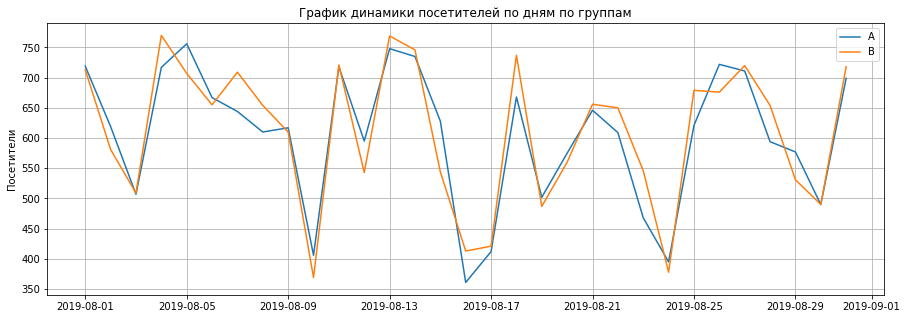

In [12]:
dinamicA = ab_visitor[ab_visitor['group']=='A'][['date','visitors']]
dinamicB = ab_visitor[ab_visitor['group']=='B'][['date','visitors']]
plt.figure(figsize=(15,5))
plt.plot(dinamicA['date'], dinamicA['visitors'], label='A')
plt.plot(dinamicB['date'], dinamicB['visitors'], label='B')
plt.title('График динамики посетителей по дням по группам')
plt.ylabel("Посетители")
plt.grid()
plt.legend() 

In [13]:
# подготовим датафрейм к дальнейшей работе с графиками
datesGroups = ab_order[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: ab_order[np.logical_and(ab_order['date'] <= x['date'], ab_order['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: ab_visitor[np.logical_and(ab_visitor['date'] <= x['date'], ab_visitor['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [14]:
cumulativeData['date'].describe()

/tmp/ipykernel_208/2191897163.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cumulativeData['date'].describe()


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

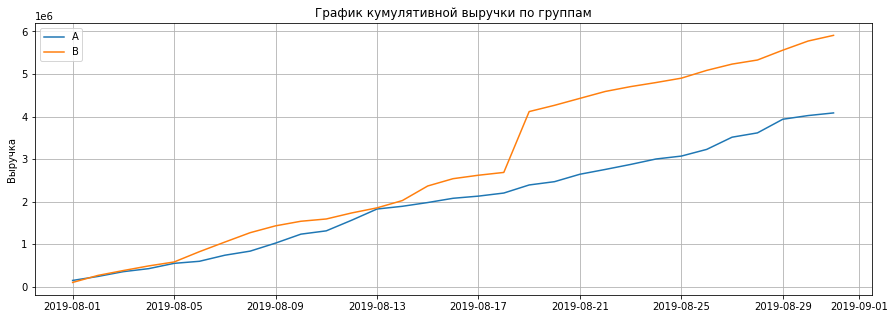

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.grid()
plt.legend() 

На графике мы видим большой скачок выручки в группе "В", произошедший 19 августа. До 13.08 выручка росла примерно одинаково, затем в группе "В" она стала расти значительно быстрее, что безусловно указывает нам на ее лидирующую позицию.

Стоит обратить внимание на резкий всплеск 19.08. Либо это был заказ на крупную сумму, либо было совершено много заказов. Можем проверить это. Возьмем в отрезок времени 18,19 и 20 число месяца,т.к на графике видно, что активный рост происходил в течение этих трех дней.

In [16]:
cumulativeRevenueB.query(' "2019-08-17" < date < "2019-08-21" ')

,date,revenue,orders
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423


Как показывает таблица, 19 числа не было совершено ничего сверхмеры того, что было 18 или 20 числа. Проверим по медианам и заказам подробнее.

In [17]:
print(ab_order.query(' date == "2019-08-19" ')['revenue'].median())
ab_order.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(10)

2630.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B
531,4016435970,4017075195,2019-08-19,13390,A


Теперь мы точно видим, что 19.08 был совершен заказ на крупную сумму (1294500), которая во много раз привышает медиану. При дальнейших подсчетах стоит учитывать данный всплеск.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

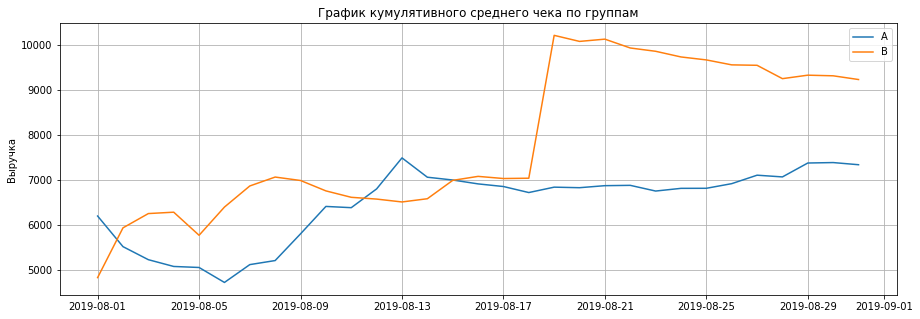

In [18]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.grid()
plt.legend() 

Здесь мы также видим резкий всплеск по среднему чеку, однако уже выше было выяснено, что это произошло из-за одного крупного заказа, совершенного 19.08. Также на графике мы можем видеть.что в самом начала у группы "А" были большие проблемы и показатели по среднему чеку проседали. Однако стоит отметить, что несмотря на плохие показатели группы "А" вначале, а также крупный заказ в группе "В", мы видим, что средний чек группы "А" стабильно растет начиная примерно  с того же 18.08, в то время как в группе "В" после резкого всплеска средний чек стал падать.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

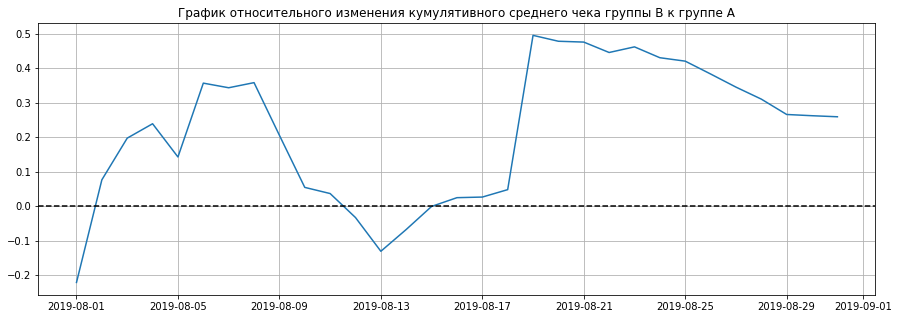

In [19]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')

Здесь мы видим примерно такую же картину: средний чек группы "В" был почти всегда выше, чем у группы "А", однако мы видим изменения с 12-14 число, где группа "А" лидировала, но не надолго. Начиная уже с 13 числа мы видим постеменный рост группы "В", затем резкий всплеск 19.08 числа, что выбило группы "В" в лидеры.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

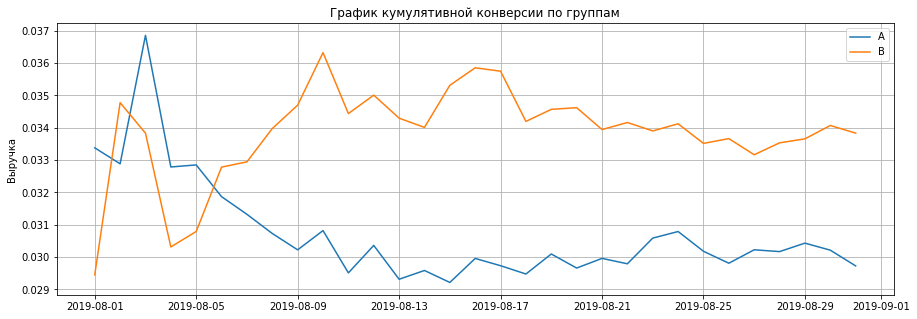

In [20]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.grid()
plt.legend()

Здесь мы видим, что конверсия группы "А" значительно больше примерно до 9.08, однако после этого числа конверсия группы "А" стала падать, в то время как у группы "В" она наоборот стала расти (10 числа произошел пик). В итоге в дальнейшем конверсия группы "В" всегда больше.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

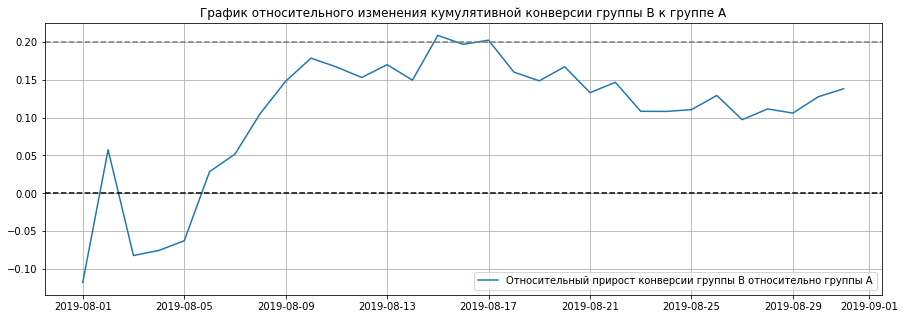

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/\
         mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

Здесь выводы точно такие же, как и выше. Начиная с 9 числа, показатели группы "В" выше, чем у группы "А".

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

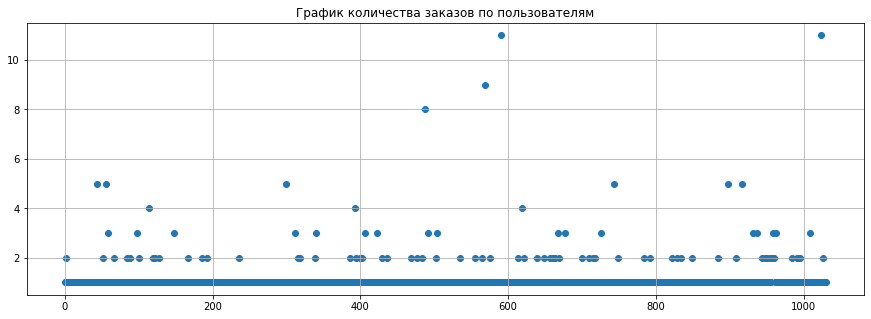

In [22]:
ordersByUsers = (ab_order.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False)
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])

На графике мы видим, что в основном происходит одна покупка, два, три или больше - скорее аномалии.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [23]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Имеет смысл посмотреть весь диапазон, чтобы определить границу аномалии.

In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99]))

[2. 2. 2. 3. 4.]


Теперь мы можем быть уверены, что заказы больше 2 это аномалии.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

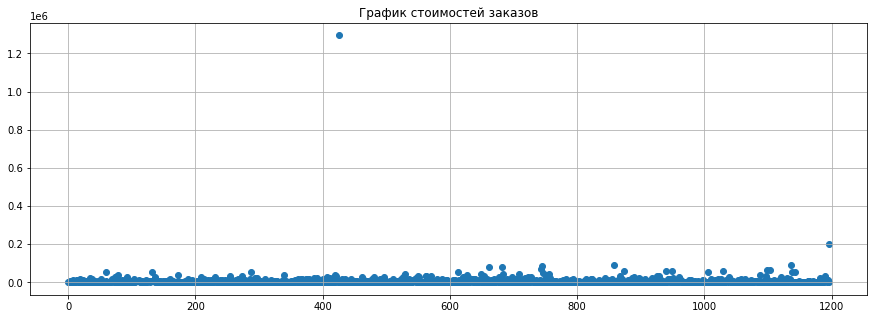

In [25]:
x_values = pd.Series(range(0, len(ab_order['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, ab_order['revenue'])

В итоге мы видим явный выброс, но с остальным поаничего не понятно. Стоит расммотреть график поближе и отбросить все данные выше 200000.

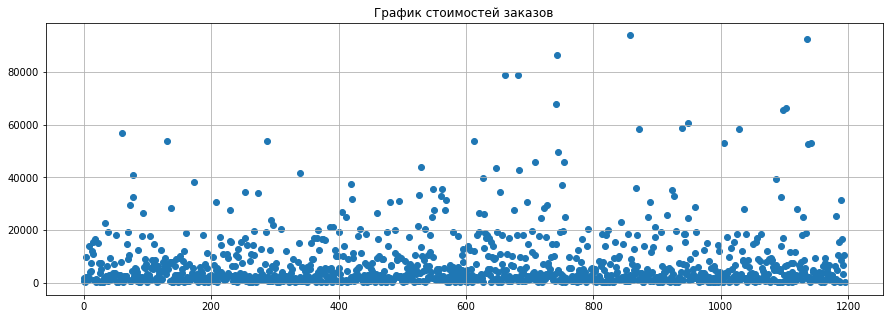

In [26]:
range_rev = ab_order[ab_order['revenue']<=200000]['revenue']
xc_values = pd.Series(range(0, len(range_rev)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xc_values, range_rev)


Чтож. теперь мы можем сделать вывод, что на графиках присуствует тот самый крупный заказ (аномалия раз) и заказ на 200 000(аномалия два). остальные заказы не привышают 100 000.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [27]:
print(np.percentile(ab_order['revenue'], [95, 99]))

[28000.  58233.2]


Границей аномальных заказов будет 58233.2

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [28]:
visitorsADaily = ab_visitor[ab_visitor['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = ab_visitor[ab_visitor['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = ab_order[ab_order['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = ab_order[ab_order['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [29]:
# теперь соединим таблицы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
21,2019-08-22,16,112741,25,162355,401,2756579,462,4589247,609,650,13459,13524
26,2019-08-27,28,286780,16,147677,495,3514698,548,5232260,711,720,16376,16523
29,2019-08-30,11,86460,24,215233,545,4022970,620,5774631,490,490,18037,18198
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
30,2019-08-31,12,61833,20,133129,557,4084803,640,5907760,699,718,18736,18916


Выясним p-value, который мы округлим до 3 знаков. alpha = 0.05.
Нулевая гипотеза: "Статистическая значимость различий в конверсии между группами отсуствует". Альтернативная гипотеза: "Статистическая значимость различий в конверсии между группами есть".

In [30]:
ordersByUsersA = (ab_order[ab_order['group'] == 'A'].groupby('visitorId', as_index=False). \
                  agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (ab_order[ab_order['group'] == 'B'].groupby('visitorId', as_index=False). \
                  agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']. \
sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']. \
sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('Относительный показатель = {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.017
Относительный показатель = 0.138


Значение p-value меньше 0.05, а это значит, что мы отвергаем нулевую гипотезу. Получается, что по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

alpha = 0.05. Нулевая гипотеза: "Статистическая значимость различий в среднем чеке заказа между группами отсуствует". Альтернативная гипотеза: "Статистическая значимость различий в среднем чеке заказа между группами есть".

In [31]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(ab_order[ab_order['group']=='A']['revenue'], ab_order[ab_order['group']=='B']['revenue'])[1]))
print('Относительный показатель = {0:.3f}'.format(ab_order[ab_order['group']=='B']['revenue'].mean()/ab_order[ab_order['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительный показатель = 0.259


Здесь мы видим, что показатель p-value больше 0.05, а это значит, что нулевая гипотеза подтверждена. Получается средние чеки по "сырым" данным имеют схожесть. Также средние чеки группы "В" больше, чем у группы "А" на ~26%.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Выше мы уже обозначили "потолок" аномалий - 58233.2, обозначим его при "очищении" данных.

In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = ab_order[ab_order['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
Всего аномальных пользователей = 31


Теперь узнаем, как их действия повлияли на результаты теста. 

In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                                       name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                                       name='orders',),],axis=0,) 

alpha = 0.05. Нулевая гипотеза: "Статистическая значимость различий в конверсии между группами отсуствует". Альтернативная гипотеза: "Статистическая значимость различий в конверсии между группами есть".

In [34]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.010
Относительный показатель = 0.174


Значение p-value меньше 0.05, получаеся мы отвергаем нулевую гипотезу. А это значит, что по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 17.4%, что выше, чем по "сырым" данным.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

alpha = 0.05. Нулевая гипотеза: "Статистическая значимость различий в среднем чеке заказа между группами отсуствует". Альтернативная гипотеза: "Статистическая значимость различий в среднем чеке заказа между группами есть"

In [35]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(
            ab_order[np.logical_and(ab_order['group'] == 'A',
                    np.logical_not(ab_order['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            ab_order[np.logical_and(ab_order['group'] == 'B',
                    np.logical_not(ab_order['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительный показатель = {0:.3f}".format(
        ab_order[np.logical_and(ab_order['group'] == 'B',
                np.logical_not(ab_order['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / ab_order[np.logical_and(ab_order['group'] == 'A',
                np.logical_not(ab_order['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.798
Относительный показатель = -0.020


Значение p-value больше 0.05, а это значит, что нулевая гипотеза подтверждена. Также мы видим, что средний чек группы "В" ненамного ниже (2%) группы "А", в то время как по сырым данным мы видим очень большой разрыв ~26%, и это из-за одного огромного заказа ~1,25млн.

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Выводы:

- Нами был выявлен аномальный заказ(1294500), который мы учитывали при анализе кумулятивной выручки. Он также повлиял на средний чек, что было нами отмечено;


- Изначально, мы отметили, что конверсия групы "А" вначале показывала лудший результат, однако в дальнейшем это изменилось(как и из-за аномального заказа группы "В", так и без него, у группы "В" результат в итоге был лучше). Хотя стоит отметить, что группа "А" показывала достаточно стабильный результат.


- Что касается конверсии, то по "сырым" и "очещенным" данным разница есть. Относительный выигрыш группы "В" над "А" по "сырым" данным 13.8% и "очещенным" даным 17.4%


- Со средним чеком все гораздо интереснее, т.к по "очищенным" данным разница между группой "А" и"В" небольшая (в пользу "А"), однако по "сырым" данным разница очень заметна, и это все из-за того аномального заказа на крупную сумму.



В итоге имеет смысл тест остановить и зафиксировать победу группы "В" над "А". Несмотря на выброс, все же показатели группы "В" выглядят более стабильно. Конверсия у "В" выше в обоях случая, а при хорошей конверсии поднять средний чек не так сложно.